In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [187]:
df= pd.read_csv("Desktop/Upgrad/bank-additional/bank-additional/bank-additional-full.csv")
pd.options.display.max_columns= 30

In [189]:
print(df.shape)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.describe()

In [192]:
df["job"]= df["job"].astype(str).replace("unknown", np.nan)
df["education"]= df["education"].astype(str).replace("unknown", np.nan)
df["default"]= df["default"].astype(str).replace("unknown", np.nan)
df["marital"]= df["marital"].astype(str).replace("unknown", np.nan)
df["housing"]= df["housing"].astype(str).replace("unknown", np.nan)
df["loan"]= df["loan"].astype(str).replace("unknown", np.nan)
df["loan"]= df["loan"].astype(str).replace("nan", np.nan)

In [193]:
df["euribor3m"]= df["euribor3m"].round(decimals= 3)
df["cons.price.idx"]= df["cons.price.idx"].round(decimals= 3)

In [194]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [195]:
df.drop("default", inplace=True, axis=1 )

# Filling Null values using ffill method.

In [196]:
df["education"].fillna(method= 'ffill', inplace=True)
df["job"].fillna(method= 'ffill', inplace=True)
df["marital"].fillna(method= 'ffill', inplace=True)
df["housing"].fillna(method= 'ffill', inplace=True)
df["loan"].fillna(method= 'ffill', inplace=True)

# Numerical and Categorical Segregation

In [197]:
numeric= ["age", "duration", "campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
categorical= [i for i in df.columns if i not in numeric]
categorical.remove('y')
target= "y"

# Box Plot of Numeric Variables

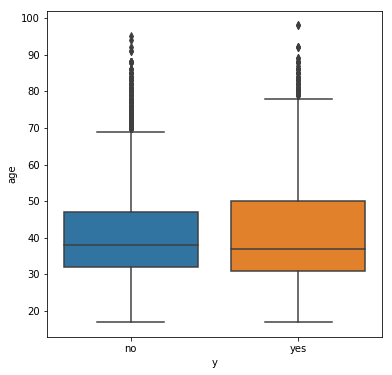

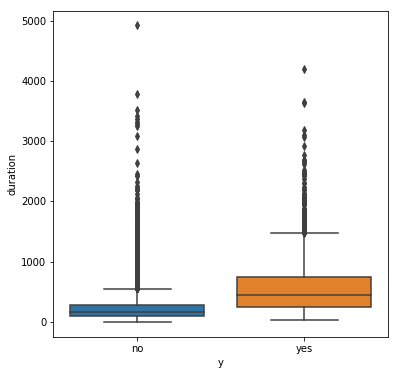

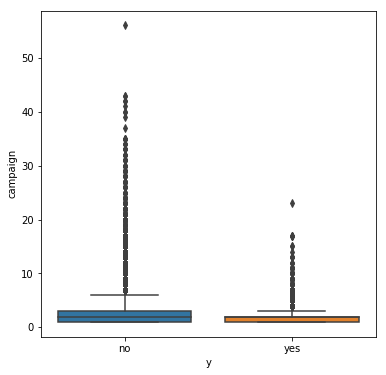

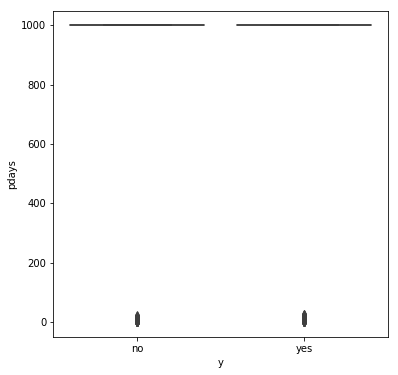

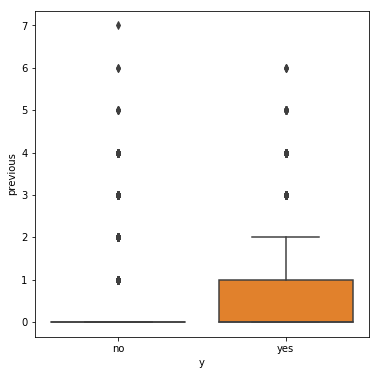

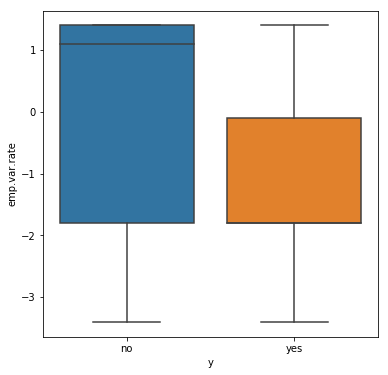

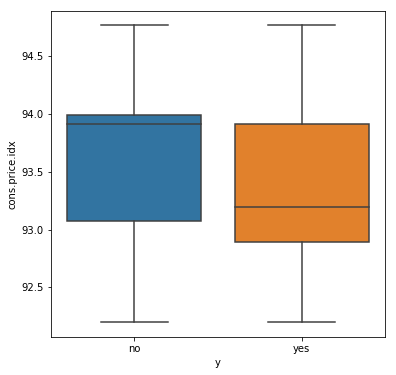

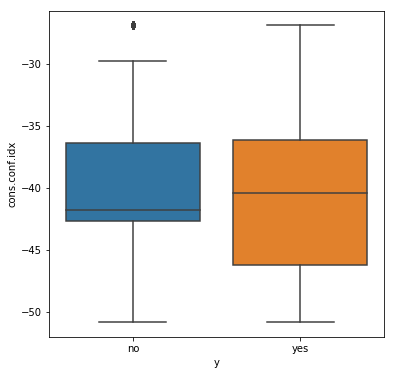

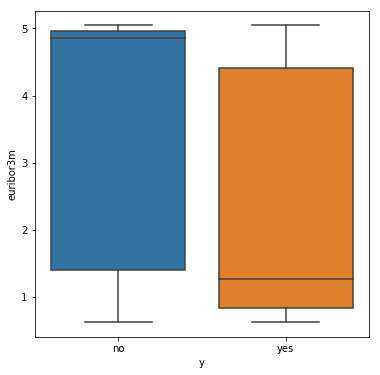

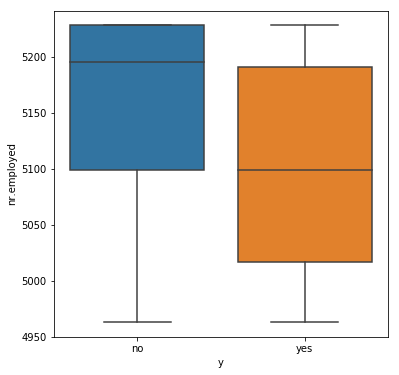

In [198]:
for i in numeric:
    plt.figure(figsize= (6,6))
    sns.boxplot(x=target, y=i, data=df)
    plt.show()

# Distribution Plot of Numeric Variables

C:\Users\gupta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


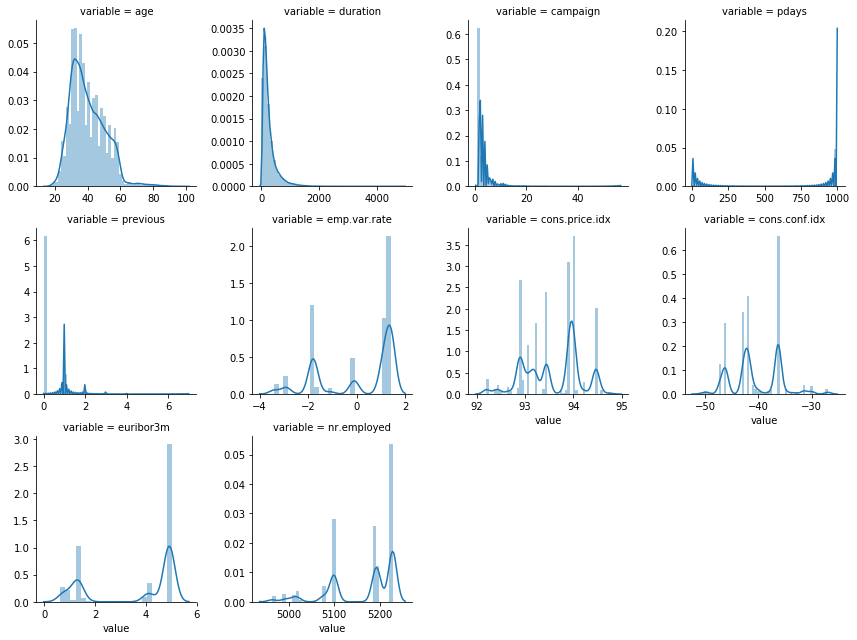

In [199]:
nd = pd.melt(df, value_vars = numeric)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')

# CountPlot of Categorical Variables

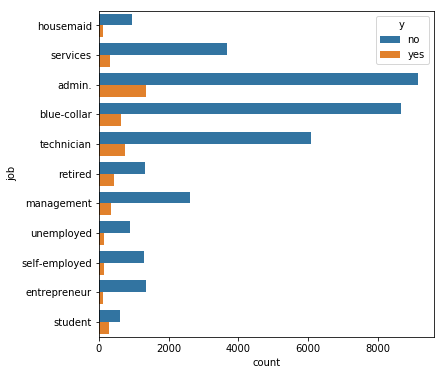

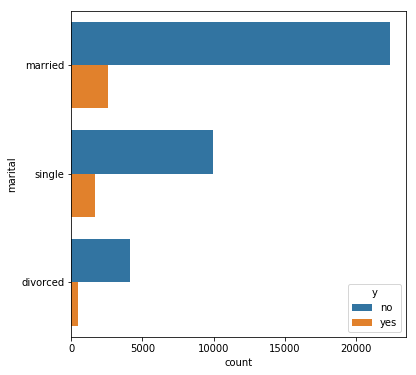

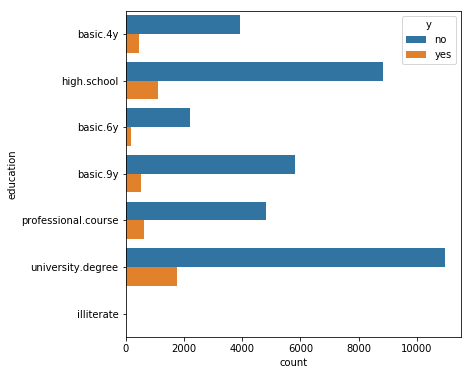

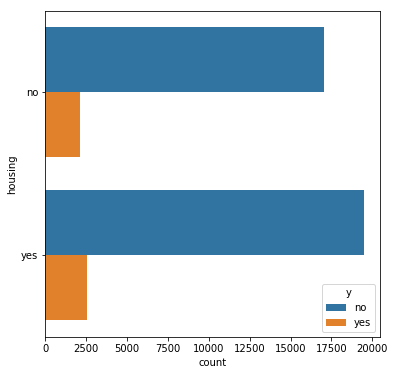

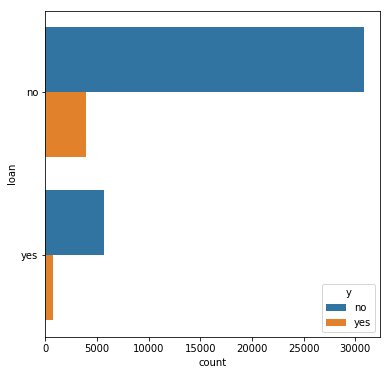

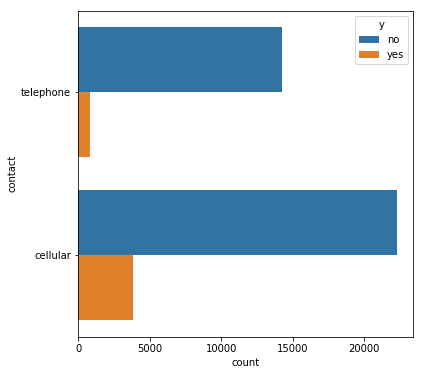

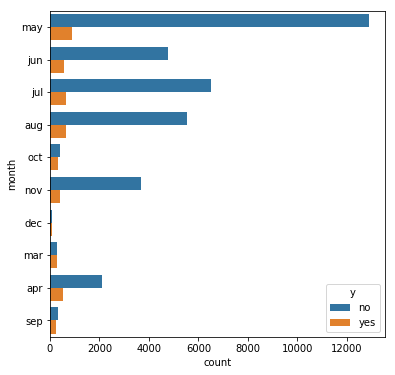

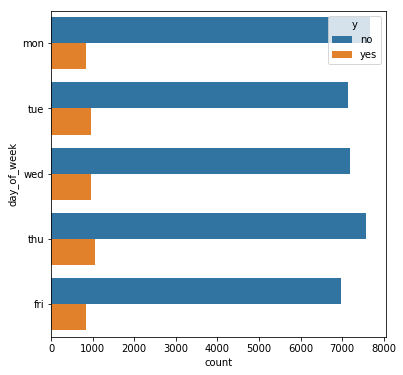

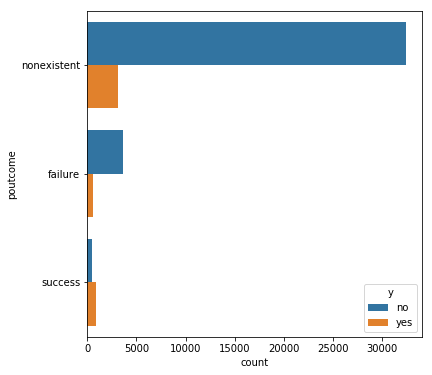

In [201]:
for i in categorical:
    plt.figure(figsize=(6,6))
    sns.countplot(y=i, hue=target, data=df)
    plt.show()

# Drawing Heat Map of Numeric Variables

In [ ]:
df1= df.drop(categorical, axis=1)

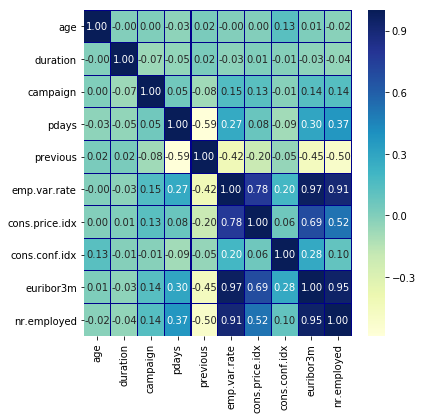

In [203]:
f,ax = plt.subplots(figsize=(6,6))
m = df1.corr()
sns.heatmap(m, annot=True, linecolor='darkblue', linewidths=.1, cmap="YlGnBu", fmt= '.2f',ax=ax)

# Features "euribor3m" and "emp.var.rate" are highly correlated, so we can drop one feature.


In [204]:
df.drop("emp.var.rate", inplace=True, axis=1)
df1.drop("emp.var.rate", inplace=True, axis=1)

In [217]:
df1.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,93.994,-36.4,4.857,5191.0,0


In [206]:
df2 = pd.get_dummies(df[categorical], drop_first=True)

In [207]:
df2.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1,0


In [216]:
df1["y"]= df1["y"].apply(lambda x: 1 if x=="yes" else 0)

In [218]:
X = df1[[i for i in df1.columns if i != "y"]]
y = df1["y"]

In [238]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

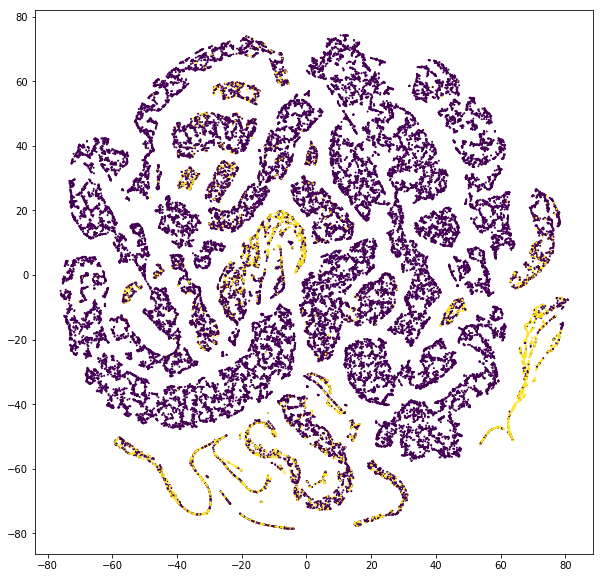

In [254]:
s = [1 for n in range(len(X_embedded[:,0]))]
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=df1[target].values, s=s)
plt.show()

# Splitting Test set and Train set

In [222]:
#we can use knn classifier in this tsne results variables..
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#split dataset into train and test data according to stratification..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

# As the data is imbalanced, we use SMOTE oversampling technique to make it balanced.


In [231]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
sm = SMOTE(random_state=12, ratio = 0.75)
X_train, y_train = sm.fit_sample(X_train, y_train)

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


# Fitting K-NN Classifier (as analyzed from TSNE plot)

In [232]:
#fitting the model and predictions on the test data..
from sklearn.metrics import accuracy_score

for i in range(10,200,10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    print(accuracy_score(neigh.predict(X_test),y_test))

0.862484218704477
0.8531611148878314
0.8503447606098864
0.8499562979508595
0.8473341750024279
0.8468485966786443
0.8467514810138875
0.8471399436729145
0.8479168689909683
0.8484024473147519
0.848013984655725
0.8470428280081577
0.8473341750024279
0.8470428280081577
0.847625521996698
0.8478197533262115
0.8495678352918326
0.8499562979508595
0.8495678352918326


# We are getting highest accuracy score for n=10 neighbours. 

# Fitting Random Forest Classifier

In [234]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25, random_state=12)
rf.fit(X_train, y_train)

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [236]:
print(rf.score(X_test, y_test))
y_pred= rf.predict(X_test)
print(recall_score(y_test, rf.predict(X_test)))

0.9087112751286782
0.618103448275862


# Fitting XG-Boost Classifier

In [251]:
from sklearn import cross_validation
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 200),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': stats.uniform(0.5, 0.35),
              'min_child_weight': [1, 2, 3]
             }
clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 15, scoring = 'f1', error_score = 0, verbose = 3, n_jobs = -1)

numFolds = 4
folds = cross_validation.KFold(n = len(X), shuffle = True, n_folds = numFolds)

estimators = []
results = np.zeros(len(X))
score = 0.0
for train_index, test_index in folds:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)

    estimators.append(clf.best_estimator_)
    results[test_index] = clf.predict(X_test)
    score += f1_score(y_test, results[test_index])
score /= numFolds

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.2min finished
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.5min finished
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.5min finished
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.5min finished
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [253]:
score

0.5004675595159724